In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
Dataset=pd.read_csv("ToyotaCorolla.csv")

In [3]:
Dataset.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
Dataset1 = Dataset[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
Dataset1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [5]:
Dataset1.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [6]:
Dataset1.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


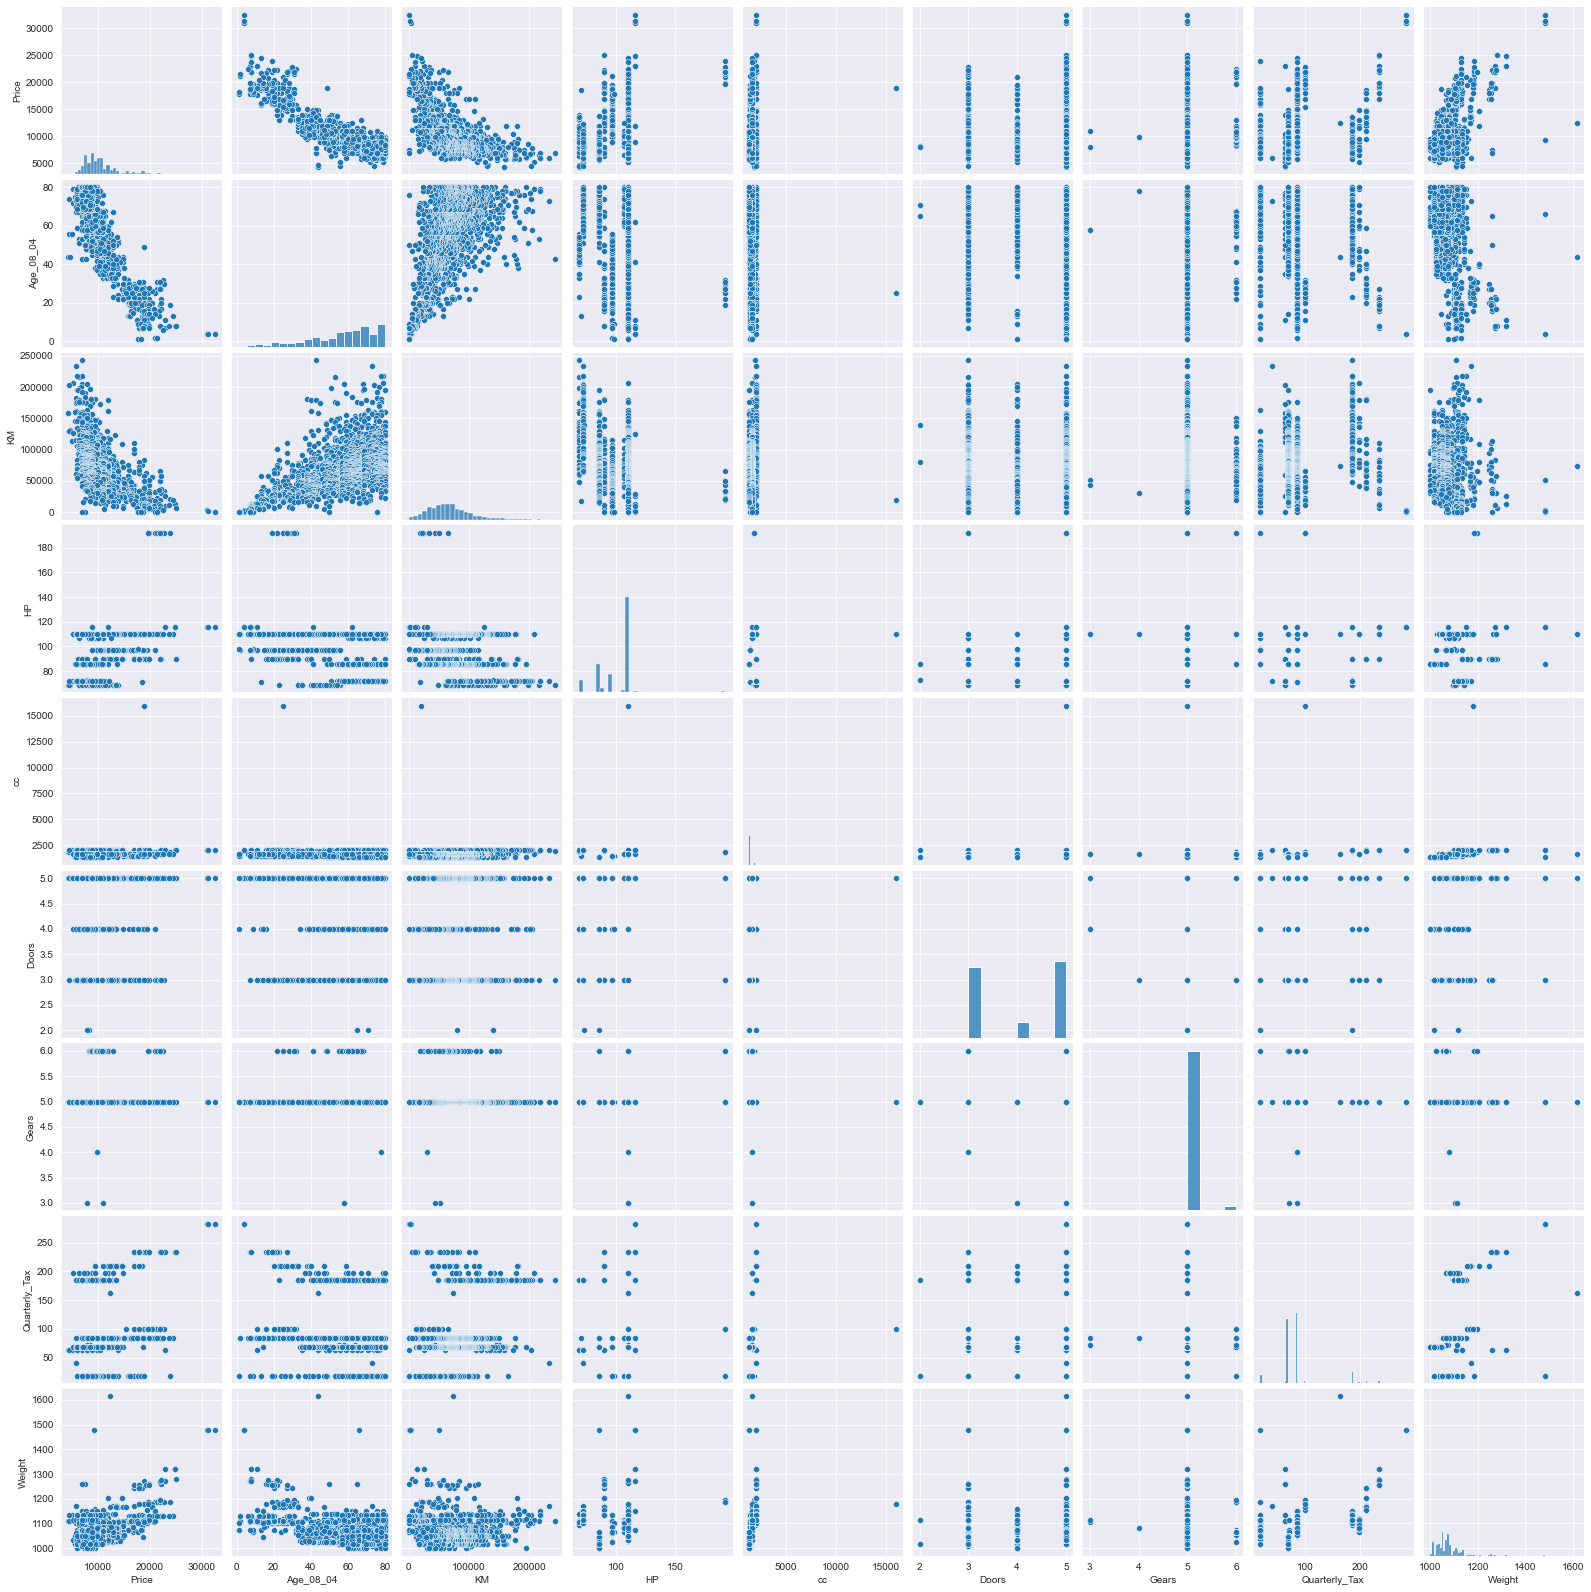

In [7]:
sns.set_style(style='darkgrid')
sns.pairplot(Dataset1)

In [8]:
import statsmodels.formula.api as smf
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=Dataset1).fit()

In [9]:
print("T_values is: ","\n",model.tvalues,"\n","P_values is: ",'\n', model.pvalues)

T_values is:  
 Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 P_values is:  
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


## hypothesis in Multi regression
B0 = beta0, B1= beta1, B2=b beta2, B3 = beta3, B4 = beta4, B5 = Beta5, B6 = beta6, B7 = beta7, B8 = beta8

H0(null hypothesis): B1 = 0, B1--> Slope is Zero Then B1 Variable is not Useful in Predicting

H1(alternate): B1 ≠ 0, B1--> Slope is not Zero B1 Variable is Useful in Predicting

H0(null hypothesis): B2 = 0, B2--> Slope is Zero Then B2 Variable is not Useful in Predicting

H1(alternate): B2 ≠ 0, B2--> Slope is not Zero B2 Variable is Useful in Predicting

H0(null hypothesis): B3 = 0, B3--> Slope is Zero Then B3 Variable is not Useful in Predicting

H1(alternate): B3 ≠ 0, B3--> Slope is not Zero B3 Variable is Useful in Predicting

H0(null hypothesis): B4 = 0, B4--> Slope is Zero Then B4 Variable is not Useful in Predicting

H1(alternate): B4 ≠ 0, B4--> Slope is not Zero B4 Variable is Useful in Predicting

H0(null hypothesis): B5 = 0, B5--> Slope is Zero Then B5 Variable is not Useful in Predicting

H1(alternate): B5 ≠ 0, B5--> Slope is not Zero B5 Variable is Useful in Predicting

H0(null hypothesis): B6 = 0, B6--> Slope is Zero Then B6 Variable is not Useful in Predicting

H1(alternate): B6 ≠ 0, B6--> Slope is not Zero B6 Variable is Useful in Predicting

H0(null hypothesis): B7 = 0, B7--> Slope is Zero Then B7 Variable is not Useful in Predicting

H1(alternate): B7 ≠ 0, B7--> Slope is not Zero B1 Variable is Useful in Predicting

H0(null hypothesis): B8 = 0, B8--> Slope is Zero Then B8 Variable is not Useful in Predicting

H1(alternate): B8 ≠ 0, B8--> Slope is not Zero B8 Variable is Useful in Predicting

In [10]:
a = 0.05

if model.pvalues[1] < a:
    print("p_value is:",model.pvalues[1],", Reject H0,Slope is not Zero and B1(Age_08_04) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[1],", Fail to Reject H0,Slope is Zero and B1(Age_08_04) is Insignificant in Predicting")

p_value is: 3.3547237728095444e-288 , Reject H0,Slope is not Zero and B1(Age_08_04) is Significant in Predicting


In [11]:
if model.pvalues[2] < a:
    print("p_value is:",model.pvalues[2],", Reject H0,Slope is not Zero and B2(KM) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[2],",Fail to Reject H0,Slope is Zero and B2(KM) is Insignifcant in Predicting")

p_value is: 7.538439394926029e-57 , Reject H0,Slope is not Zero and B2(KM) is Significant in Predicting


In [12]:
if model.pvalues[3] < a:
    print("p_value is:",model.pvalues[3],", Reject H0,Slope is not Zero and B3(HP) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[3],",Fail to Reject H0,Slope is Zero and B3(HP) is Insignifcant in Predicting")

p_value is: 3.7572181341330087e-28 , Reject H0,Slope is not Zero and B3(HP) is Significant in Predicting


In [13]:
if model.pvalues[4] < a:
    print("p_value is:",model.pvalues[4],", Reject H0,Slope is not Zero and B3(cc) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[4],",Fail to Reject H0,Slope is Zero and B3(cc) is Insignifcant in Predicting")

p_value is: 0.17909018530661125 ,Fail to Reject H0,Slope is Zero and B3(cc) is Insignifcant in Predicting


In [14]:
if model.pvalues[5] < a:
    print("p_value is:",model.pvalues[5],", Reject H0,Slope is not Zero and B5(Doors) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[5],",Fail to Reject H0,Slope is Zero and B5(Doors) is Insignifcant in Predicting")

p_value is: 0.9677716127462748 ,Fail to Reject H0,Slope is Zero and B5(Doors) is Insignifcant in Predicting


In [15]:
if model.pvalues[6] < a:
    print("p_value is:",model.pvalues[6],", Reject H0,Slope is not Zero and B6(Gears) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[6],",Fail to Reject H0,Slope is Zero and B6(Gears) is Insignifcant in Predicting")

p_value is: 0.0026065489418189715 , Reject H0,Slope is not Zero and B6(Gears) is Significant in Predicting


In [16]:
if model.pvalues[7] < a:
    print("p_value is:",model.pvalues[7],", Reject H0,Slope is not Zero and B7(Quarterly_Tax) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[7],",Fail to Reject H0,Slope is Zero and B7(Quarterly_Tax) is Insignifcant in Predicting")

p_value is: 0.0026191478895129902 , Reject H0,Slope is not Zero and B7(Quarterly_Tax) is Significant in Predicting


In [17]:
if model.pvalues[8] < a:
    print("p_value is:",model.pvalues[8],", Reject H0,Slope is not Zero and B7(Quarterly_Tax) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[8],",Fail to Reject H0,Slope is Zero and B7(Quarterly_Tax) is Insignifcant in Predicting")

p_value is: 2.048575613737894e-52 , Reject H0,Slope is not Zero and B7(Quarterly_Tax) is Significant in Predicting


In [18]:
if model.pvalues[7] < a:
    print("p_value is:",model.pvalues[7],", Reject H0,Slope is not Zero and B7(Quarterly_Tax) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[7],",Fail to Reject H0,Slope is Zero and B7(Quarterly_Tax) is Insignifcant in Predicting")

p_value is: 0.0026191478895129902 , Reject H0,Slope is not Zero and B7(Quarterly_Tax) is Significant in Predicting


In [19]:
if model.pvalues[8] < a:
    print("p_value is:",model.pvalues[8],", Reject H0,Slope is not Zero and B8(Weight) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[8],",Fail to Reject H0,Slope is Zero and B8(Weight) is Insignifcant in Predicting")

p_value is: 2.048575613737894e-52 , Reject H0,Slope is not Zero and B8(Weight) is Significant in Predicting


In [20]:
First_model_R2 = (model.rsquared,model.rsquared_adj)
First_model_R2

(0.8637627463428192, 0.8629989775766963)

In [21]:
Dataset2 = Dataset1.drop(["Doors","cc"], axis=1)
Dataset2.head()

,Price,Age_08_04,KM,HP,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,5,210,1165
1,13750,23,72937,90,5,210,1165
2,13950,24,41711,90,5,210,1165
3,14950,26,48000,90,5,210,1165
4,13750,30,38500,90,5,210,1170


In [22]:
import statsmodels.formula.api as smf
model = smf.ols('Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight',data=Dataset2).fit()

In [23]:
Second_model_R2 = (model.rsquared,model.rsquared_adj)

In [24]:
if First_model_R2[1]<Second_model_R2[1]:
    print("2nd Model is better as its Adj_R2",Second_model_R2[1],"is more than",First_model_R2[1])
else:
    print("1st Model is better as its Adj_R2",First_model_R2[1],"is more than",Second_model_R2[1])

2nd Model is better as its Adj_R2 0.8630174531381534 is more than 0.8629989775766963


In [25]:
rsq_age = smf.ols('Age_08_04~KM+HP+Gears+Quarterly_Tax+Weight',data=Dataset2).fit().rsquared
vif_age = 1/(1-rsq_age)

rsq_km = smf.ols('KM~Age_08_04+HP+Gears+Quarterly_Tax+Weight',data=Dataset2).fit().rsquared
vif_km = 1/(1-rsq_km)

rsq_hp = smf.ols('HP~Age_08_04+KM+Gears+Quarterly_Tax+Weight',data=Dataset2).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_gears = smf.ols('Gears~Age_08_04+KM+HP+Quarterly_Tax+Weight',data=Dataset2).fit().rsquared
vif_gears = 1/(1-rsq_gears)

rsq_quarterly_tax = smf.ols('Quarterly_Tax~Age_08_04+KM+HP+Gears+Weight',data=Dataset2).fit().rsquared
vif_quarterly_tax = 1/(1-rsq_quarterly_tax)

rsq_weight = smf.ols('Weight~Age_08_04+KM+HP+Gears+Quarterly_Tax',data=Dataset2).fit().rsquared
vif_weight = 1/(1-rsq_weight)

d1 ={'Variables':['age','km','hp','gears','quarterly_tax','weight'],'VIF':[vif_age,vif_km,vif_hp,vif_gears,vif_quarterly_tax,vif_weight]}
Vif_frame = pd.DataFrame(d1)
Vif_frame


,Variables,VIF
0,age,1.884335
1,km,1.746492
2,hp,1.400460
3,gears,1.058932
4,quarterly_tax,2.263600
5,weight,2.297072


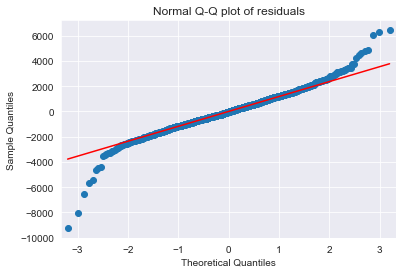

In [26]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [27]:
list(np.where(model.resid>3000))

[array([  16,   52,   62,   74,   91,  109,  110,  111,  115,  125,  141,
         147,  154,  161,  171,  179,  523,  557,  796, 1054, 1058, 1079,
        1402], dtype=int64)]

In [28]:
def get_standardized_values ( vals ):
    return  (vals - vals.mean())/vals.std()

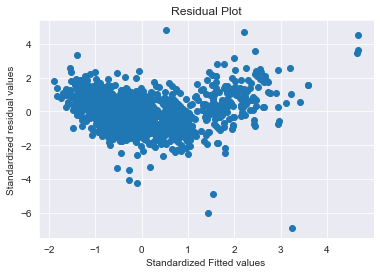

In [29]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))

plt.title("Residual Plot")
plt.xlabel("Standardized Fitted values")
plt.ylabel("Standardized residual values")
plt.show()

eval_env: 1


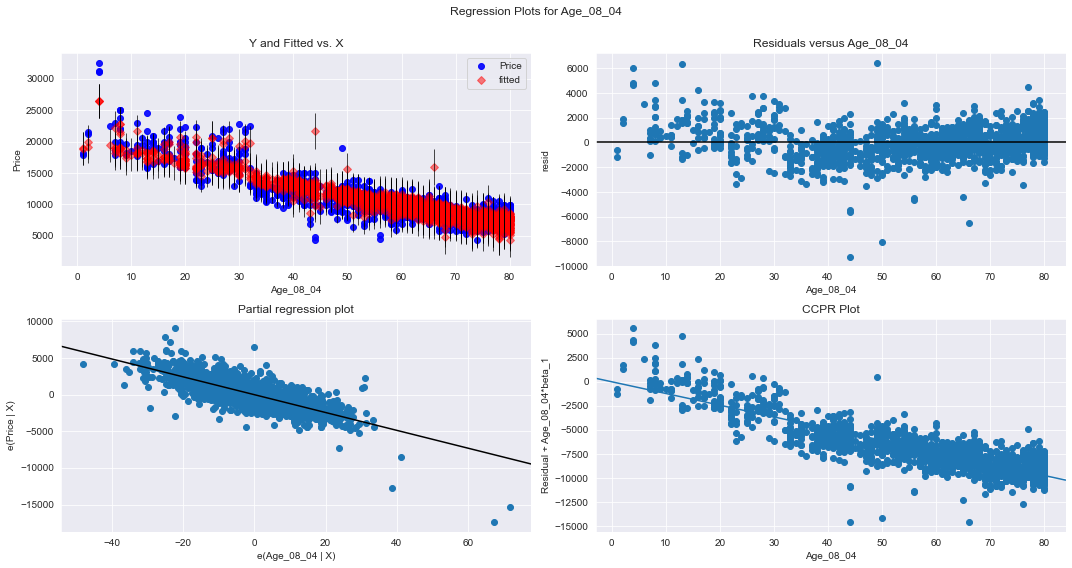

In [30]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show() #ccpr plot has scope which means "Age_08_04" is significant

eval_env: 1


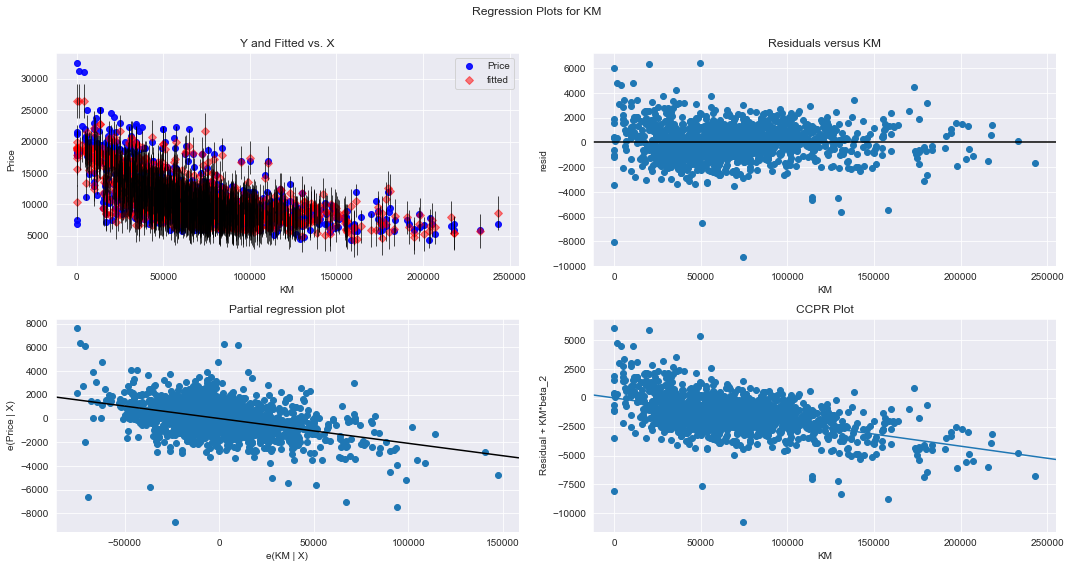

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show() # ccpr plot has scope which means KM is significant 

eval_env: 1


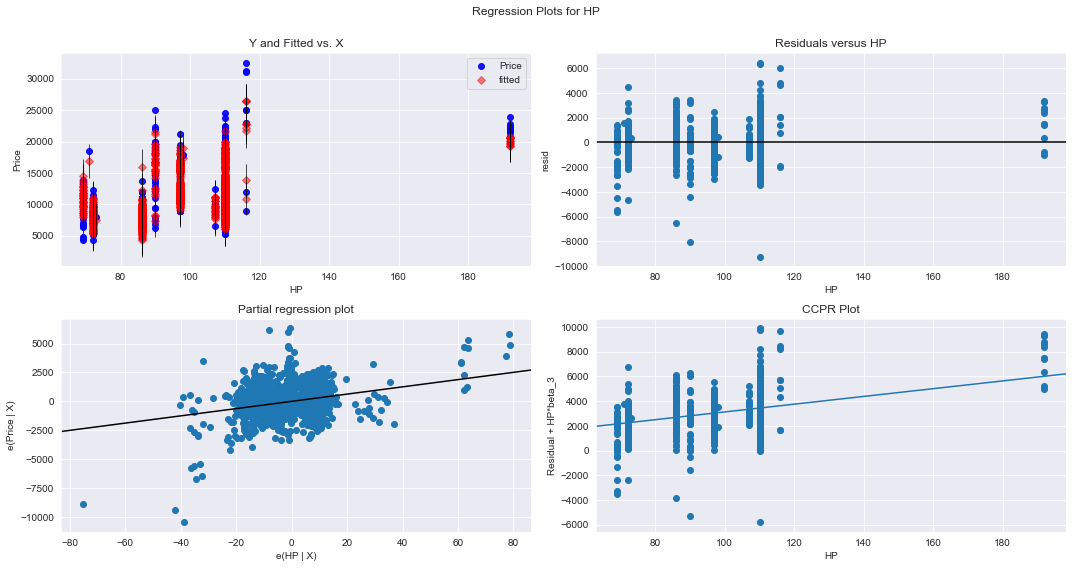

In [32]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show() #CCPR Plot has Scope Which means HP is Significant

eval_env: 1


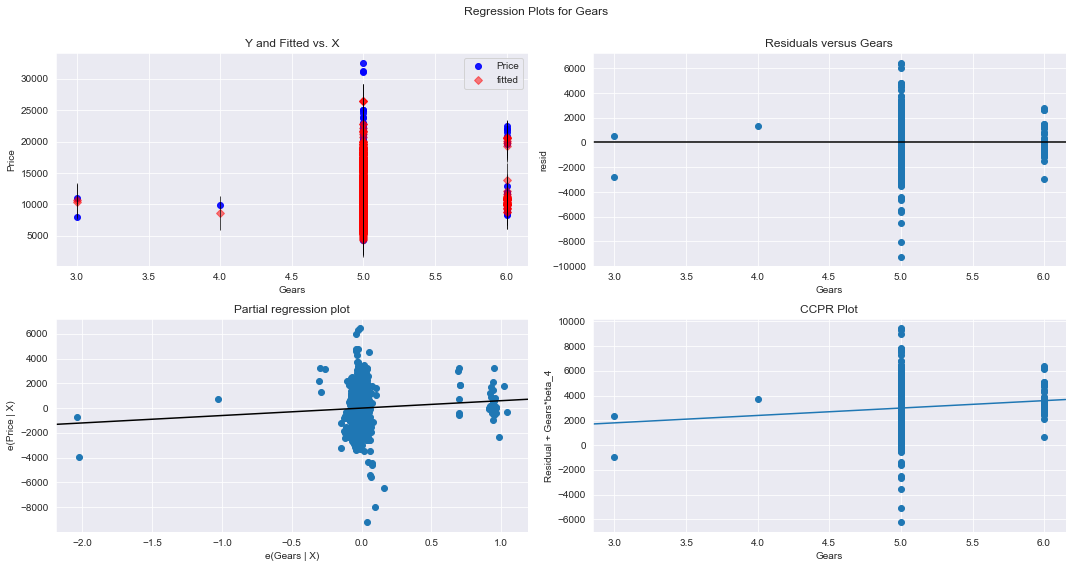

In [33]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show() # CCPR Plot has Scope Which means Gears is Significant

eval_env: 1


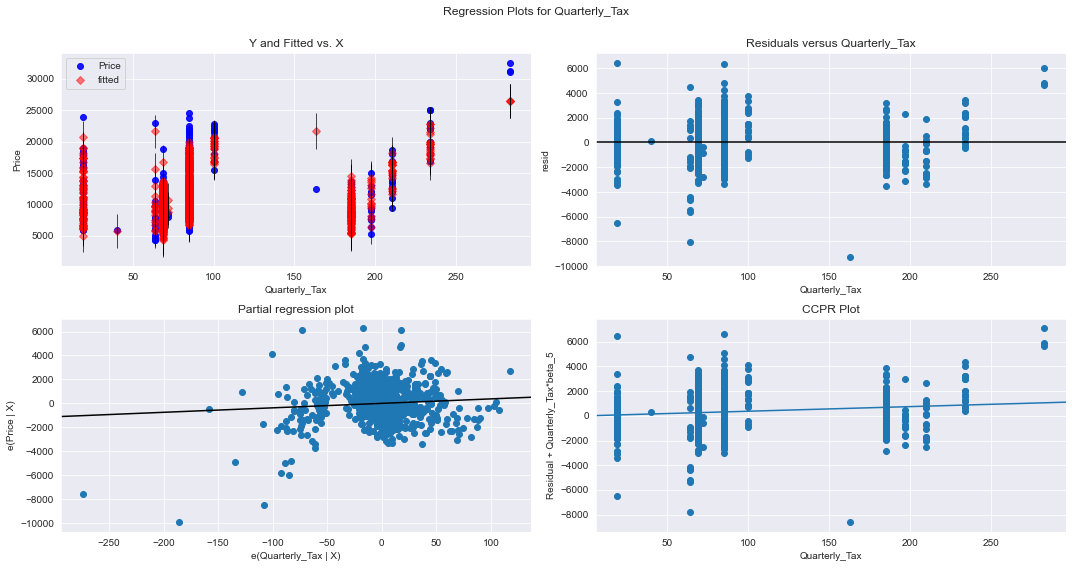

In [33]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Quarterly_Tax", fig=fig)
plt.show() #CCPR Plot has Scope Which means Quarterly_Tax is Significant

eval_env: 1


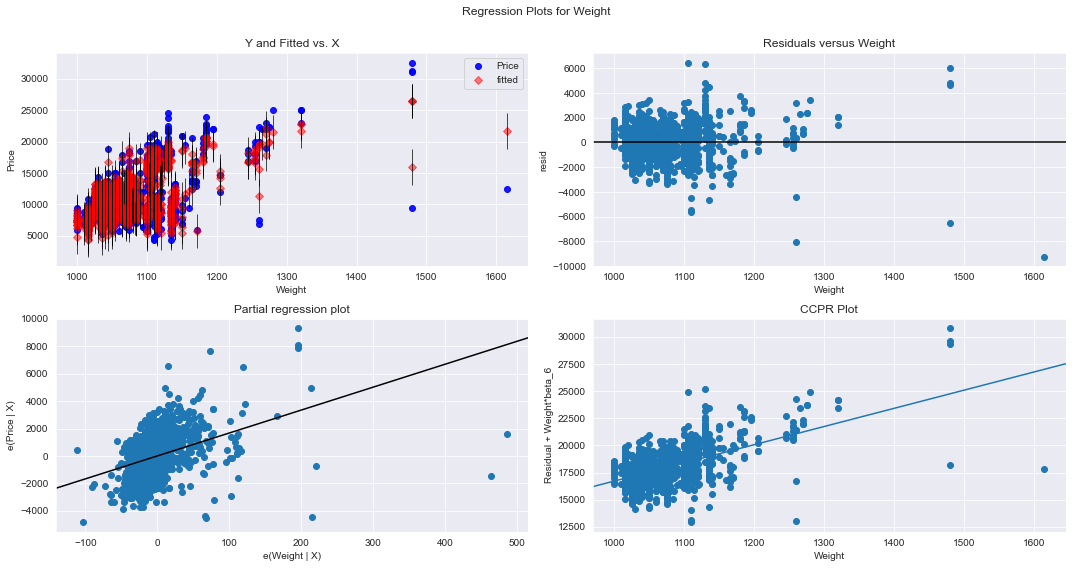

In [34]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show() # CCPR Plot has Scope Which means Weight is Significant

In [35]:
model_influence = model.get_influence()
t = model_influence.cooks_distance[0]

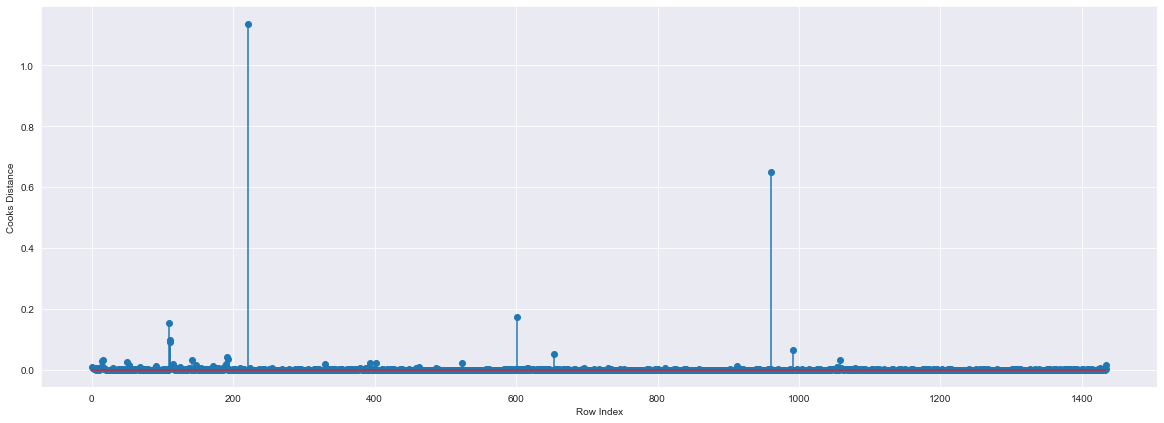

In [36]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(Dataset2)), np.round(t,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [37]:
#index and value of influencer where c is more than .5
(np.argmax(t),np.max(t)) # inference: cook distance gives 221 index datapoint as the potential outliers
                          #but, lets get some more no of outliers using Leverage method.

(221, 1.1365473823198593)

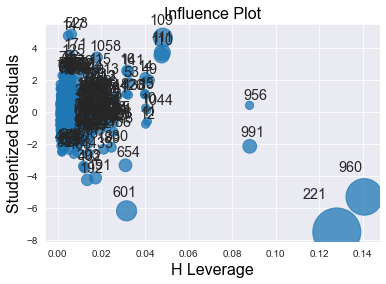

In [39]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [40]:
# 3*((k + 1)/n) -- Formula to determine Influnce / Leverage point
k = Dataset2.shape[1] # k = no of rows
n = Dataset2.shape[0] # n = no of columns
leverage_point = 3*((k+1)/n)
print(leverage_point) # Inference: After 0.016 any Datapoint is a outlier, so datapoint with index 601,960,991,956 are potential outliers

0.016713091922005572


In [41]:
Dataset2[Dataset2.index.isin([221,601,960,991,956])]

,Price,Age_08_04,KM,HP,Gears,Quarterly_Tax,Weight
221,12450,44,74172,110,5,163,1615
601,7500,50,1,90,5,64,1260
956,10950,58,51421,110,3,85,1105
960,9390,66,50806,86,5,19,1480
991,7950,58,43000,110,3,72,1114


In [42]:
#See the differences in HP and other variable values
Dataset2.head()

,Price,Age_08_04,KM,HP,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,5,210,1165
1,13750,23,72937,90,5,210,1165
2,13950,24,41711,90,5,210,1165
3,14950,26,48000,90,5,210,1165
4,13750,30,38500,90,5,210,1170


In [43]:
Dataset3 = Dataset2.drop(Dataset2.index[[221,601,956,960,991]],axis=0).reset_index()

In [44]:
Dataset3 = Dataset3.drop(['index'],axis=1)
Dataset3.head()

,Price,Age_08_04,KM,HP,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,5,210,1165
1,13750,23,72937,90,5,210,1165
2,13950,24,41711,90,5,210,1165
3,14950,26,48000,90,5,210,1165
4,13750,30,38500,90,5,210,1170


In [45]:
import statsmodels.formula.api as smf
model = smf.ols('Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight',data=Dataset3).fit()

In [46]:
Third_model_R2 = (model.rsquared,model.rsquared_adj)
Third_model_R2

(0.8778896214222306, 0.8773751114001332)

In [47]:
if Second_model_R2[0]<Third_model_R2[0]:
    print("3rd Model is Better as its R2",Third_model_R2[0],"is more then",Second_model_R2[0])
else:
    print("2nd Model is Better as its R2",Second_model_R2[0],"is more then",Third_model_R2[0])

3rd Model is Better as its R2 0.8778896214222306 is more then 0.8635902024630113


In [48]:
# inference: R_squared of 3rd model is more than R_squared of 2nd model, so 3rd is better then 2nd model

In [47]:
model_influence = model.get_influence()
t = model_influence.cooks_distance[0]

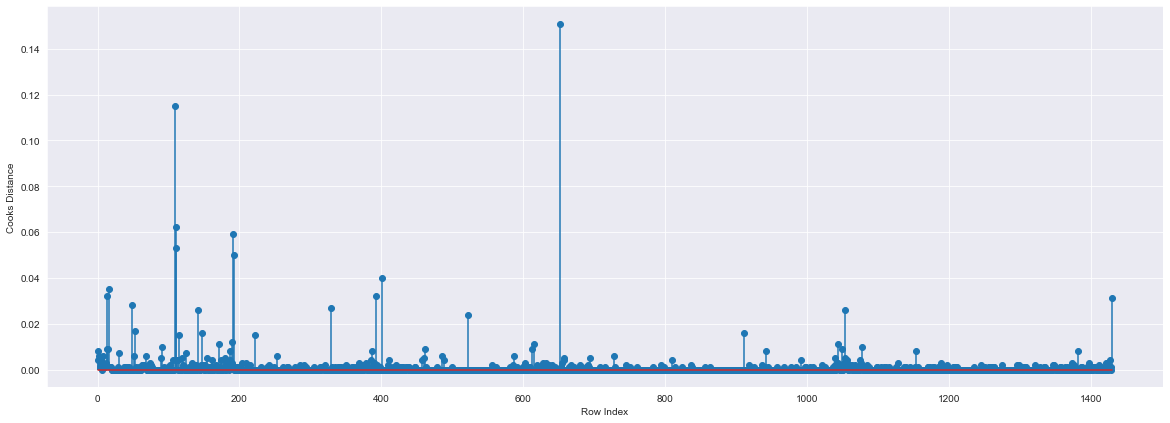

In [50]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(Dataset3)), np.round(t,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [48]:
(np.argmax(t),np.max(t))

(652, 0.15144608026072015)

In [50]:
Dataset4 = Dataset3.drop(Dataset3.index[[652]],axis=0).reset_index()

In [51]:
Dataset4= Dataset4.drop(['index'],axis=1)
Dataset4.head()

,Price,Age_08_04,KM,HP,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,5,210,1165
1,13750,23,72937,90,5,210,1165
2,13950,24,41711,90,5,210,1165
3,14950,26,48000,90,5,210,1165
4,13750,30,38500,90,5,210,1170


In [52]:
import statsmodels.formula.api as smf
model = smf.ols('Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight',data=Dataset4).fit()

In [53]:
Fourth_model_R2 = (model.rsquared,model.rsquared_adj)

In [54]:
Fourth_model_R2

(0.8798382524734587, 0.8793315971781956)

In [55]:
if Third_model_R2[0]<Fourth_model_R2[0]:
    print("4th model is better as its adjR2",Fourth_model_R2[0],"is more than",Third_model_R2[0])
else:
    print("3rd model is bettter as its adjR2",Third_model_R2[0],"is more than",Fourth_model_R2[0])

4th model is better as its adjR2 0.8798382524734587 is more than 0.8778896214222306


In [56]:
model_influence = model.get_influence()
t = model_influence.cooks_distance[0]

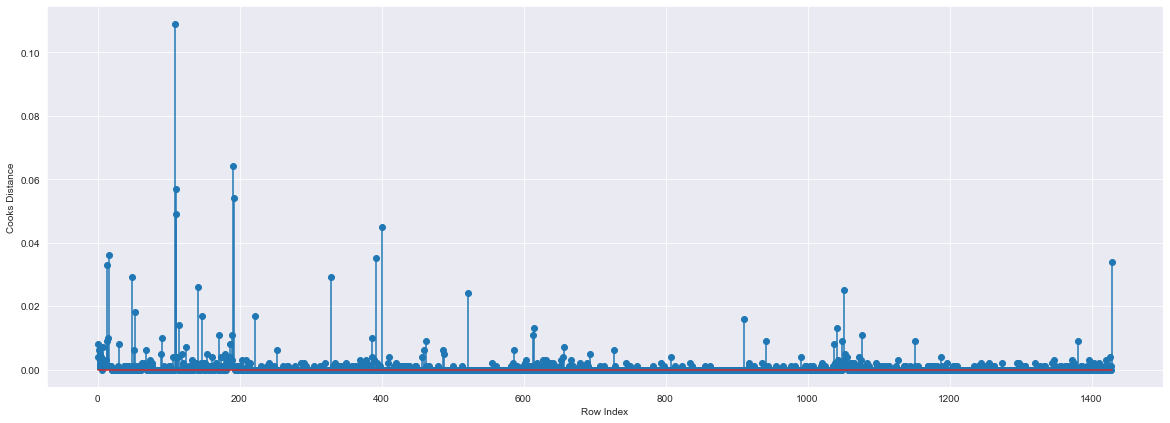

In [57]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(Dataset4)), np.round(t,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [58]:
(np.argmax(t),np.max(t)) #index and value of influencer where t is more than .5

(109, 0.10931448988722181)

In [61]:
Dataset5=Dataset4.drop(Dataset4.index[[109]],axis=0).reset_index()
Dataset5.head()

,index,Price,Age_08_04,KM,HP,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,5,210,1165
1,1,13750,23,72937,90,5,210,1165
2,2,13950,24,41711,90,5,210,1165
3,3,14950,26,48000,90,5,210,1165
4,4,13750,30,38500,90,5,210,1170


In [63]:
import statsmodels.formula.api as smf
check_model = smf.ols('Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight',data=Dataset5).fit()

In [65]:
Fifth_model_R2 = (check_model.rsquared,check_model.rsquared_adj)
Fifth_model_R2

(0.8777991974853101, 0.8772835822848262)

In [67]:
if Fourth_model_R2[0]<Fifth_model_R2[0]:
    print("Fifth Model is better as its adjR2",Fifth_model_R2[0],"is more than",Fourth_model_R2[0])
else:
    print("Fourth Model is better as its adjR2",Fourth_model_R2[0],"is more than",Fifth_model_R2[0])

Fourth Model is better as its adjR2 0.8798382524734587 is more than 0.8777991974853101


In [68]:
new_data=pd.DataFrame({'Age_08_04':30,"KM":55000,"HP":100,"Gears":5,"Quarterly_Tax":150,"Weight":1111},index=[1])
new_data

,Age_08_04,KM,HP,Gears,Quarterly_Tax,Weight
1,30,55000,100,5,150,1111


In [69]:
model.predict(new_data)

1    14728.456765
dtype: float64

In [70]:
model.params

Intercept       -13426.470046
Age_08_04         -113.182735
KM                  -0.021993
HP                  23.225875
Gears              532.210031
Quarterly_Tax       -3.152102
Weight              25.426818
dtype: float64

In [72]:
# Inference: Intercept is B0 = -12666.22,
#Age_08_04 B1 = -113.95,y
#KM is B2 = -0.02
#HP is B3 = 23.46
#Gears is B4 = 538.31 
#Quarterly_Tax is B5 = -3.03
#Weight is B6 = 24.6


### Manually calculating and checking the regresssion equation of the final model

# Y = B0 + B1X1 + B2X2 + B3X3 + B4X4 + B5X5 +B6X6

# From model
# B0 = -12666.2
# B1 = -113.95 
# B2 = -0.02 
# B3 = 23.46 
# B4 = 538.31 
# B5 = -3.03
# B6 = 24.6

Y = (-12666.2) + (-113.9*30) + (-0.02*55000) + (23.4*100) + (538.3*5) + (-3.03*150) + (24.6*1111)

print(Y)

14724.400000000001
